In [1]:
import pandas as pd

# Load the movies dataset
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

# Load the ratings dataset
ratings = pd.read_csv('ratings_small.csv')

# Display basic info
print("Movies Dataset:")
print(movies.info(), "\n")

print("Ratings Dataset:")
print(ratings.info())


Movies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null 

In [2]:
# Select only necessary columns
movies = movies[['id', 'title', 'overview', 'genres', 'vote_average', 'vote_count']]
print("Selected Columns:\n", movies.head())


Selected Columns:
       id                        title  \
0    862                    Toy Story   
1   8844                      Jumanji   
2  15602             Grumpier Old Men   
3  31357            Waiting to Exhale   
4  11862  Father of the Bride Part II   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                                              genres  vote_average  vote_count  
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...           7.7      5415.0  
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...           6.9      2413.0  
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...           6.5        92.0  
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           6.1       

In [3]:
import ast

# Convert ID to numeric, drop invalid values
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies.dropna(subset=['id', 'title', 'overview'], inplace=True)
movies['id'] = movies['id'].astype(int)

# Convert genres from JSON string to list
def extract_genres(genre_str):
    try:
        genres_list = ast.literal_eval(genre_str)  # Convert string to list
        return [genre['name'] for genre in genres_list] if isinstance(genres_list, list) else []
    except:
        return []

movies['genres'] = movies['genres'].apply(extract_genres)

print("Cleaned Data:\n", movies.head())


Cleaned Data:
       id                        title  \
0    862                    Toy Story   
1   8844                      Jumanji   
2  15602             Grumpier Old Men   
3  31357            Waiting to Exhale   
4  11862  Father of the Bride Part II   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                         genres  vote_average  vote_count  
0   [Animation, Comedy, Family]           7.7      5415.0  
1  [Adventure, Fantasy, Family]           6.9      2413.0  
2             [Romance, Comedy]           6.5        92.0  
3      [Comedy, Drama, Romance]           6.1        34.0  
4                      [Comedy]           5.7       173.0  


In [4]:
# Remove movies with very low vote counts
movies = movies[movies['vote_count'] >= 50]

print("Filtered Movies Count:", len(movies))


Filtered Movies Count: 9115


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


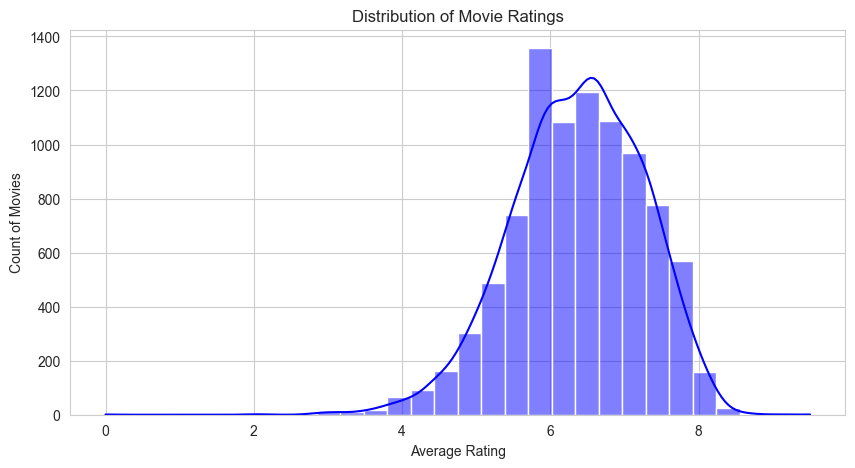

In [6]:
# Set plot style
sns.set_style("whitegrid")

# Histogram of ratings
plt.figure(figsize=(10, 5))
sns.histplot(movies['vote_average'], bins=30, kde=True, color='blue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count of Movies")
plt.show()


C:\Users\niyut\AppData\Local\Temp\ipykernel_15888\1206447706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['vote_count'], y=top_movies['title'], palette="viridis")


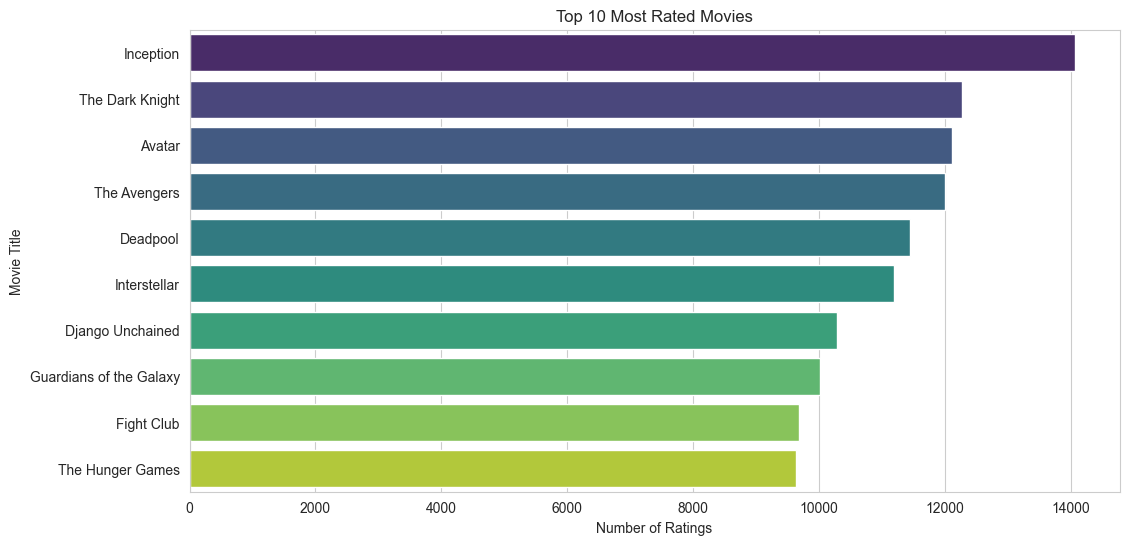

In [7]:
# Top 10 most-rated movies
top_movies = movies.sort_values(by="vote_count", ascending=False).head(10)

# Bar chart for most-rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['vote_count'], y=top_movies['title'], palette="viridis")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Rated Movies")
plt.show()


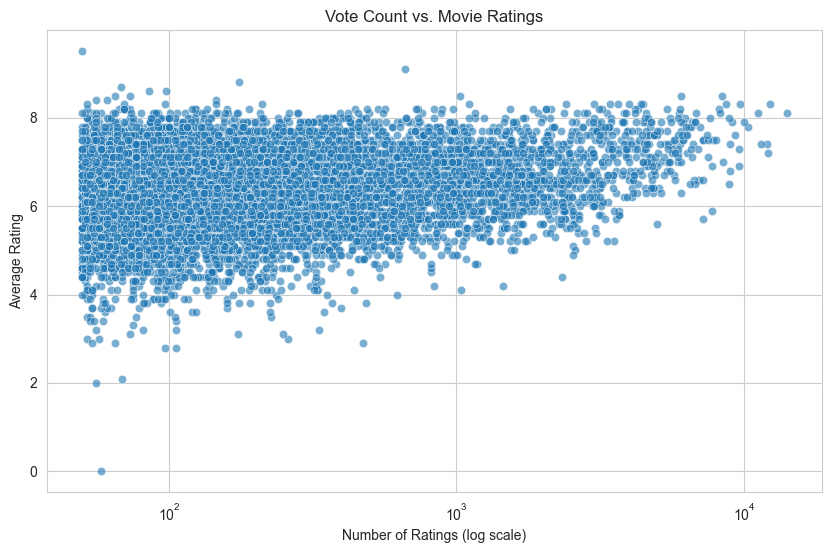

In [8]:
# Scatter plot: vote count vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies['vote_count'], y=movies['vote_average'], alpha=0.6)
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.title("Vote Count vs. Movie Ratings")
plt.show()


In [9]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


In [10]:
# Load ratings dataset
ratings = pd.read_csv("ratings_small.csv")

# Define rating scale (0.5 to 5.0)
reader = Reader(rating_scale=(0.5, 5))

# Load dataset into Surprise format
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [11]:
# Split dataset into train (80%) and test (20%)
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Evaluate the model using RMSE (lower RMSE = better accuracy)
rmse = accuracy.rmse(predictions)
print("Model RMSE:", rmse)


RMSE: 0.9066
Model RMSE: 0.906576091827145


In [12]:
def recommend_movies_for_user(user_id, n=10):
    """Recommends top N movies for a given user based on predicted ratings."""
    # Get a list of all unique movie IDs
    all_movie_ids = movies['id'].unique()
    
    # Get movies the user has already rated
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].unique()
    
    # Get movies the user hasn't rated yet
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for unrated movies
    predictions = [svd.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
    
    # Sort movies by predicted rating (highest first)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_movie_ids = [pred.iid for pred in predictions[:n]]
    
    # Fetch movie titles for the recommended movie IDs
    recommended_movies = movies[movies['id'].isin(top_movie_ids)][['title', 'id']]
    
    return recommended_movies

# Example: Recommend movies for User ID 1
user_recommendations = recommend_movies_for_user(user_id=1, n=10)
print(user_recommendations)


                          title    id
534        Sleepless in Seattle   858
915                       Laura  1939
938                The 39 Steps   260
3058               Galaxy Quest   926
4020   The Million Dollar Hotel   318
6163                 Straw Dogs   994
6910        Birdman of Alcatraz   898
6924                    Bullitt   916
11592               Ghost Rider  1250
11922            License to Wed  2959
